# Let's decompose time series data

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.stats import boxcox
df = sns.load_dataset('flights')
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [3]:
df.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [2]:
def plot_p(df, column, title, ylabel):
    '''
    The function plot_p helps me to plot the number of passengers over time.
    
    -----------
    Parameters:
    df: DataFrame that works as basis of the plot
    column: The column that is plotted on the y-axis
    title: The title of the plot
    ylabel: The lable of the y-axis
    '''
    df[column].plot(figsize=(12, 8))
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.show()

In [4]:
df['Date'] = pd.to_datetime(df.month.astype(str) + '-' + df.year.astype(str))
df.set_index('Date', inplace=True)
df.head()

,year,month,passengers
Date,,,
1949-01-01,1949,January,112
1949-02-01,1949,February,118
1949-03-01,1949,March,132
1949-04-01,1949,April,129
1949-05-01,1949,May,121


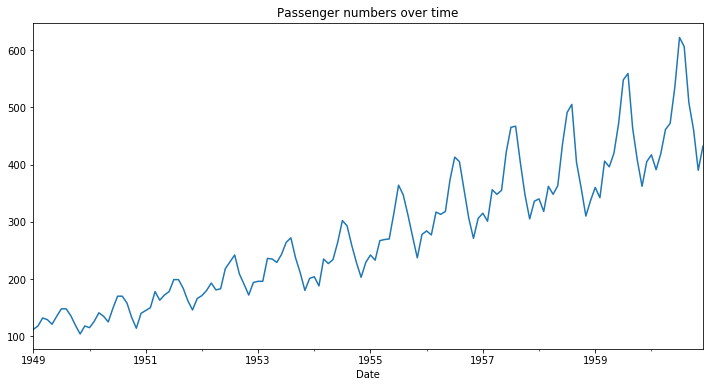

In [5]:
df.passengers.plot(figsize=(12,6), title='Passenger numbers over time')
plt.show()

## 1) Remove the trend

- Differencing - if the trend is linear
- Second order differencing - if the trend is exponential
- Take the rolling mean and subtract it

### Differencing

In [9]:
df['difference'] = df['passengers'].diff()
df.head()

,year,month,passengers,difference
Date,,,,
1949-01-01,1949,January,112,NaN
1949-02-01,1949,February,118,6.0
1949-03-01,1949,March,132,14.0
1949-04-01,1949,April,129,-3.0
1949-05-01,1949,May,121,-8.0


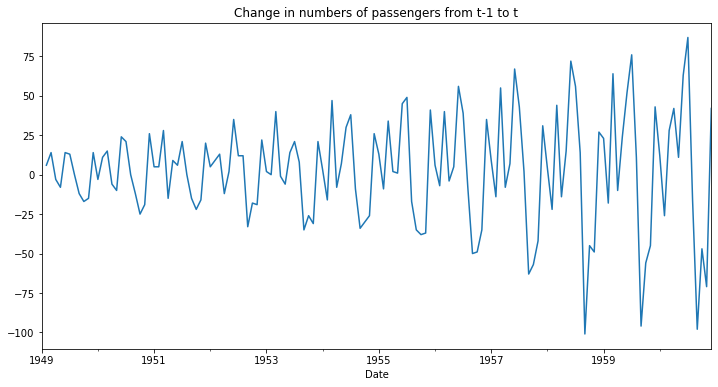

In [10]:
df['difference'].plot(figsize=(12,6), title='Change in numbers of passengers from t-1 to t')
plt.show()

In [11]:
df['difference'].mean()

2.237762237762238

## Second order differencing

In [12]:
df['2nddifference'] = df['difference'].diff()
df.head()

,year,month,passengers,difference,2nddifference
Date,,,,,
1949-01-01,1949,January,112,NaN,NaN
1949-02-01,1949,February,118,6.0,NaN
1949-03-01,1949,March,132,14.0,8.0
1949-04-01,1949,April,129,-3.0,-17.0
1949-05-01,1949,May,121,-8.0,-5.0


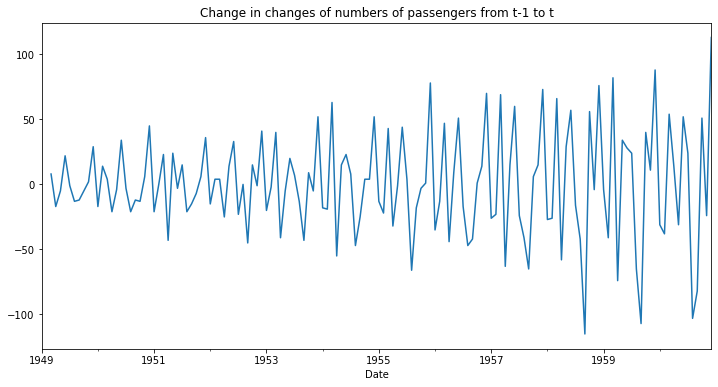

In [13]:
df['2nddifference'].plot(figsize=(12,6), title='Change in changes of numbers of passengers from t-1 to t')

In [14]:
df['2nddifference'].mean()

0.2535211267605634

In [15]:
x = np.linspace(1, 100, 101)
y = x**2
df_exp = pd.DataFrame({'x': x, 'y': y})
df_exp.head()

,x,y
0,1.00,1.0000
1,1.99,3.9601
2,2.98,8.8804
3,3.97,15.7609
4,4.96,24.6016


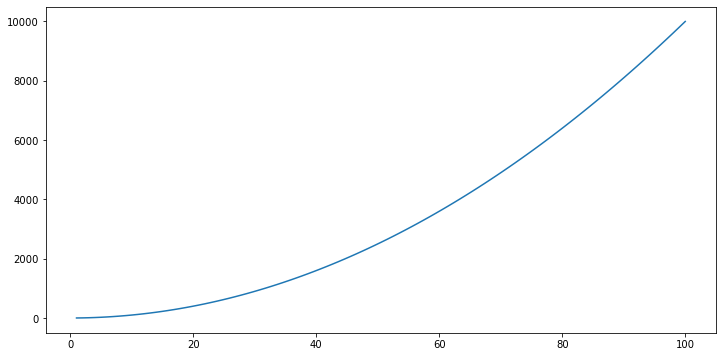

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df_exp.x, df_exp.y)

In [19]:
df_exp['diff'] = df_exp['y'].diff()
df_exp['2ddiff'] = df_exp['diff'].diff()
df_exp.head()

,x,y,diff,2ddiff
0,1.00,1.0000,NaN,NaN
1,1.99,3.9601,2.9601,NaN
2,2.98,8.8804,4.9203,1.9602
3,3.97,15.7609,6.8805,1.9602
4,4.96,24.6016,8.8407,1.9602


In [25]:
plt.figure(figsize=(12,6))
plt.plot(df_exp.x, df_exp.y)
plt.plot(df_exp.x, df_exp['diff'])
plt.plot(df_exp.x, df_exp['2ddiff'])

AttributeError: 'DataFrame' object has no attribute 'x'

<Figure size 864x432 with 0 Axes>

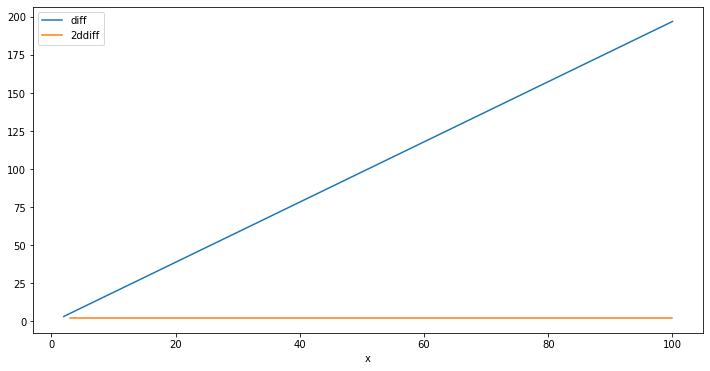

In [30]:
df_exp[['diff', '2ddiff']].plot(figsize=(12,6))

In [31]:
df_exp.tail()

,y,diff,2ddiff
x,,,
96.04,9223.6816,189.1791,1.9602
97.03,9414.8209,191.1393,1.9602
98.02,9607.9204,193.0995,1.9602
99.01,9802.9801,195.0597,1.9602
100.00,10000.0000,197.0199,1.9602


## Take the rolling mean and subtract it from the data

In [33]:
df['rolling'] = df.passengers.rolling(12, center=True).mean()
df.head(10)

,year,month,passengers,difference,2nddifference,rolling
Date,,,,,,
1949-01-01,1949,January,112,NaN,NaN,NaN
1949-02-01,1949,February,118,6.0,NaN,NaN
1949-03-01,1949,March,132,14.0,8.0,NaN
1949-04-01,1949,April,129,-3.0,-17.0,NaN
1949-05-01,1949,May,121,-8.0,-5.0,NaN
1949-06-01,1949,June,135,14.0,22.0,NaN
1949-07-01,1949,July,148,13.0,-1.0,126.666667
1949-08-01,1949,August,148,0.0,-13.0,126.916667
1949-09-01,1949,September,136,-12.0,-12.0,127.583333


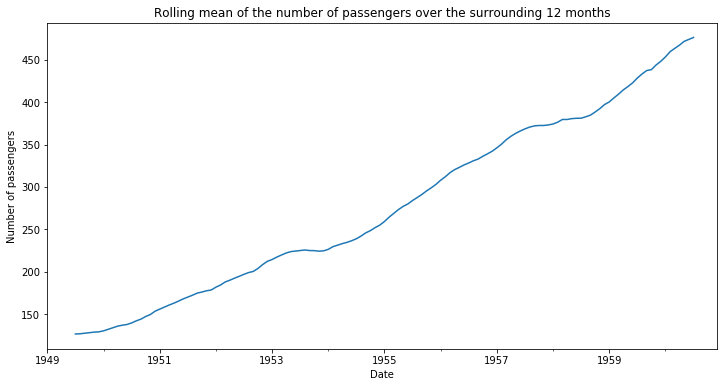

In [34]:
df['rolling'].plot(figsize=(12, 6))
plt.title('Rolling mean of the number of passengers over the surrounding 12 months')
plt.ylabel('Number of passengers')
plt.xlabel('Date')
plt.show()

In [36]:
df['de-trended'] = df.passengers - df['rolling']
df.head(10)

,year,month,passengers,difference,2nddifference,rolling,de-trended
Date,,,,,,,
1949-01-01,1949,January,112,NaN,NaN,NaN,NaN
1949-02-01,1949,February,118,6.0,NaN,NaN,NaN
1949-03-01,1949,March,132,14.0,8.0,NaN,NaN
1949-04-01,1949,April,129,-3.0,-17.0,NaN,NaN
1949-05-01,1949,May,121,-8.0,-5.0,NaN,NaN
1949-06-01,1949,June,135,14.0,22.0,NaN,NaN
1949-07-01,1949,July,148,13.0,-1.0,126.666667,21.333333
1949-08-01,1949,August,148,0.0,-13.0,126.916667,21.083333
1949-09-01,1949,September,136,-12.0,-12.0,127.583333,8.416667


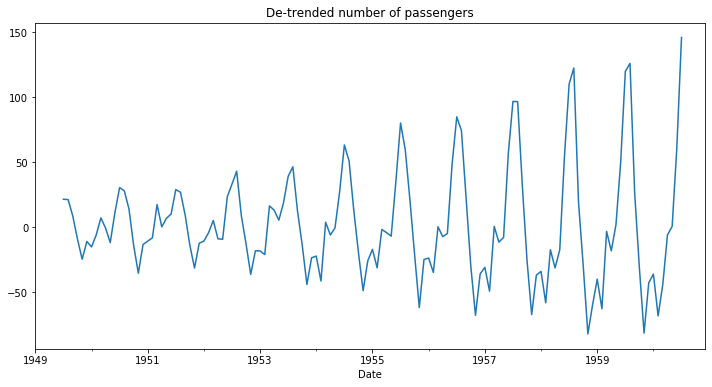

In [37]:
df['de-trended'].plot(figsize=(12,6), title='De-trended number of passengers')

### Take out the change in volatility by taking the logarithm of the time series

In [39]:
df['log_passengers'] = np.log(df.passengers)
df.head()

,year,month,passengers,difference,2nddifference,rolling,de-trended,log_passengers
Date,,,,,,,,
1949-01-01,1949,January,112,NaN,NaN,NaN,NaN,4.718499
1949-02-01,1949,February,118,6.0,NaN,NaN,NaN,4.770685
1949-03-01,1949,March,132,14.0,8.0,NaN,NaN,4.882802
1949-04-01,1949,April,129,-3.0,-17.0,NaN,NaN,4.859812
1949-05-01,1949,May,121,-8.0,-5.0,NaN,NaN,4.795791


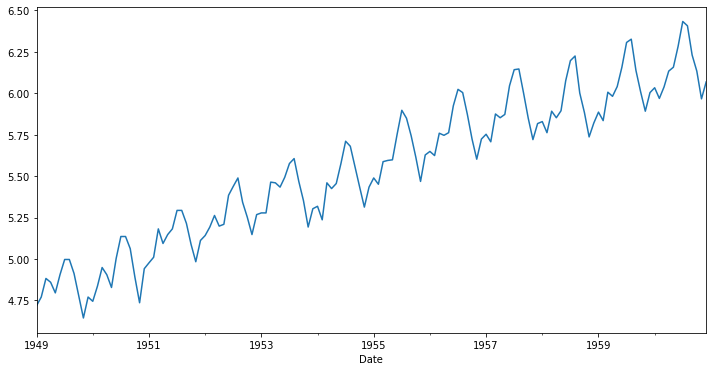

In [40]:
df['log_passengers'].plot(figsize=(12,6))

In [42]:
df['log_diff'] = df.log_passengers.diff()
df.head()

,year,month,passengers,difference,2nddifference,rolling,de-trended,log_passengers,log_diff
Date,,,,,,,,,
1949-01-01,1949,January,112,NaN,NaN,NaN,NaN,4.718499,NaN
1949-02-01,1949,February,118,6.0,NaN,NaN,NaN,4.770685,0.052186
1949-03-01,1949,March,132,14.0,8.0,NaN,NaN,4.882802,0.112117
1949-04-01,1949,April,129,-3.0,-17.0,NaN,NaN,4.859812,-0.022990
1949-05-01,1949,May,121,-8.0,-5.0,NaN,NaN,4.795791,-0.064022


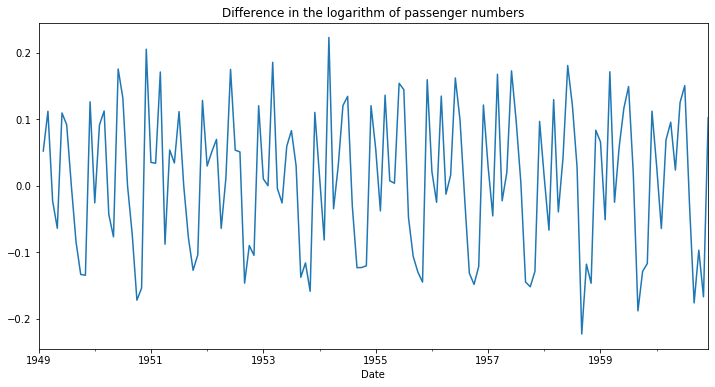

In [43]:
df['log_diff'].plot(figsize=(12,6), title='Difference in the logarithm of passenger numbers')
plt.show()

### Take out seasonality

Demean each value by subtracting the monthly mean

In [48]:
df['monthly_mean'] = df.groupby('month')['log_diff'].transform('mean')
df['de-seasonalized'] = df['log_diff'] - df['monthly_mean']
df.head()

,year,month,passengers,difference,2nddifference,rolling,de-trended,log_passengers,log_diff,monthly_mean,de-seasonalized
Date,,,,,,,,,,,
1949-01-01,1949,January,112,NaN,NaN,NaN,NaN,4.718499,NaN,0.025154,NaN
1949-02-01,1949,February,118,6.0,NaN,NaN,NaN,4.770685,0.052186,-0.011986,0.064172
1949-03-01,1949,March,132,14.0,8.0,NaN,NaN,4.882802,0.112117,0.140296,-0.028179
1949-04-01,1949,April,129,-3.0,-17.0,NaN,NaN,4.859812,-0.022990,-0.021200,-0.001789
1949-05-01,1949,May,121,-8.0,-5.0,NaN,NaN,4.795791,-0.064022,0.007696,-0.071718


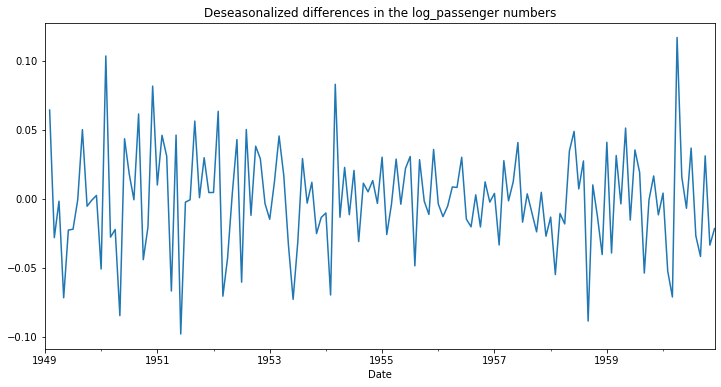

In [49]:
df['de-seasonalized'].plot(figsize=(12,6), title='Deseasonalized differences in the log_passenger numbers')

## This is the time series we will actually do our analysis on!

1. We make predictions for the df['de-seasonalized']
- We add back on the monthly_mean
- We take the first value and create whole log_series
- We exponentiate the values to arrive back at the acutal values

In [53]:
df.head()

,year,month,passengers,difference,2nddifference,rolling,de-trended,log_passengers,log_diff,monthly_mean,de-seasonalized
Date,,,,,,,,,,,
1949-01-01,1949,January,112,NaN,NaN,NaN,NaN,4.718499,NaN,0.025154,NaN
1949-02-01,1949,February,118,6.0,NaN,NaN,NaN,4.770685,0.052186,-0.011986,0.064172
1949-03-01,1949,March,132,14.0,8.0,NaN,NaN,4.882802,0.112117,0.140296,-0.028179
1949-04-01,1949,April,129,-3.0,-17.0,NaN,NaN,4.859812,-0.022990,-0.021200,-0.001789
1949-05-01,1949,May,121,-8.0,-5.0,NaN,NaN,4.795791,-0.064022,0.007696,-0.071718


In [54]:
# 2. add back the monthly mean
reconstruct = df['de-seasonalized'] + df.monthly_mean
reconstruct

Date
1949-01-01         NaN
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
                ...   
1960-08-01   -0.026060
1960-09-01   -0.176399
1960-10-01   -0.097083
1960-11-01   -0.167251
1960-12-01    0.102279
Length: 144, dtype: float64

In [56]:
df.log_passengers[0]

4.718498871295094

In [58]:
# 3. Take the whole series and recreate the whole log series
reconstruct[0] = df.log_passengers[0]
reconstruct.head()

Date
1949-01-01    4.718499
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
dtype: float64

In [59]:
reconstruct = reconstruct.cumsum()
reconstruct.head()

Date
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
dtype: float64

In [60]:
# 4. We exponentiate the values to arrive back at the acutal values
reconstruct = np.exp(reconstruct)
reconstruct.head()

Date
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
dtype: float64

## Introduce time series package

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

Additive model

Figure(432x288)


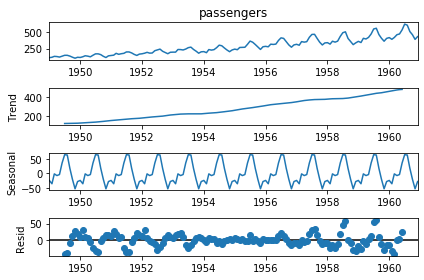

In [62]:
decompose = seasonal_decompose(df['passengers'], model='additive')
print(decompose.plot())

In [69]:
decompose.resid[20:40]

Date
1950-09-01    -4.228535
1950-10-01     5.226010
1950-11-01    16.051768
1950-12-01    13.911616
1951-01-01    12.623737
1951-02-01    26.646465
1951-03-01    18.407828
1951-04-01     6.911616
1951-05-01     9.839646
1951-06-01   -26.486111
1951-07-01   -36.080808
1951-08-01   -37.406566
1951-09-01    -7.978535
1951-10-01     5.809343
1951-11-01    21.551768
1951-12-01    14.453283
1952-01-01    12.623737
1952-02-01    29.979798
1952-03-01     6.199495
1952-04-01    -2.255051
Name: resid, dtype: float64

Figure(432x288)


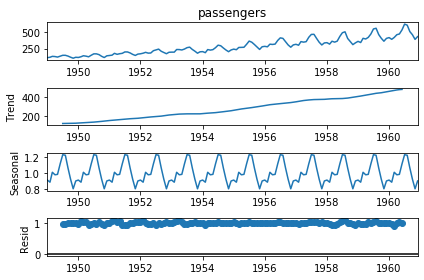

In [70]:
decompose = seasonal_decompose(df['passengers'], model='multiplicative')
print(decompose.plot())

Additive: $y_t = S_t + T_t + R_t$

Multiplicative: $y_t = S_t * T_t * R_t$

In [71]:
decompose.resid

Date
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64